## Artificial Intelligence for Health analytics

Changhyun Kim (ID: 21134342)

### Preparing datasets

loading training, development, and test datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("features/train.csv",sep=';')
train_data = train_data.drop(['name', 'frameTime'], axis=1)

devel_data = pd.read_csv("features/devel.csv",sep=';')
devel_data = devel_data.drop(['name', 'frameTime'], axis=1)

test_data = pd.read_csv("features/test.csv",sep=';')
test_data = test_data.drop(['name', 'frameTime'], axis=1)

In [3]:
freq_params = ['F0semitoneFrom27.5Hz_sma3nz_amean',
               'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
               'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
               'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
               'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
               'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
               'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
               'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
               'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
               'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
               'jitterLocal_sma3nz_amean',
               'jitterLocal_sma3nz_stddevNorm','F1frequency_sma3nz_amean',
               'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
               'F1bandwidth_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
               'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
               'F2bandwidth_sma3nz_stddevNorm','F3frequency_sma3nz_amean',
               'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
               'F3bandwidth_sma3nz_stddevNorm']

energy_params = ['loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope','shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm']

spectral_params = ['spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm','logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm','F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm','spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',]

temporal_params = ['VoicedSegmentsPerSec', 'loudnessPeaksPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']

len(energy_params)

14

In [4]:
X_train = np.asarray(train_data.values)
X_devel = np.asarray(devel_data.values)
X_test = np.asarray(test_data.values)

print(X_train.shape)
print(X_devel.shape)
print(X_test.shape)

(9505, 88)
(9596, 88)
(9551, 88)


In [5]:
train_label = pd.read_csv('labels/train.csv')
train_label = train_label.drop(['file_name'], axis=1)

devel_label = pd.read_csv('labels/devel.csv')
devel_label = devel_label.drop(['file_name'], axis=1)

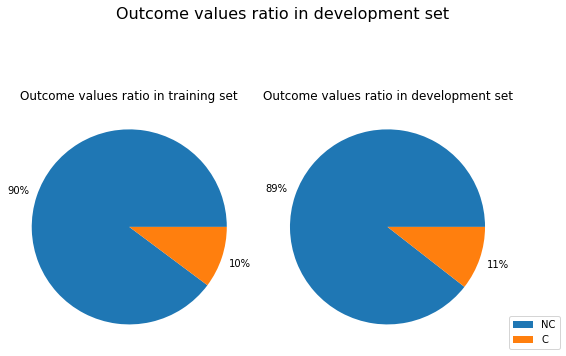

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8,6), sharex=False, sharey=False)    
labels = ['NC', 'C']

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        x = train_label.iloc[:,0]
        title = 'Outcome values ratio in training set'
    else:
        x = devel_label.iloc[:,0]
        title = 'Outcome values ratio in development set'
    
    ax.pie(x.value_counts(),  autopct='%1.0f%%', pctdistance=1.2)
    ax.set_title(title)

plt.legend(loc=(1,0), labels=labels)
plt.suptitle(title, size=16)
plt.tight_layout();
# plt.pie(train_label['Cold (upper respiratory tract infection)'].value_counts())
# plt.title('Distributions of SepsisLabel')
# plt.legend(loc=(1,0), labels=labels)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

encoder = LabelEncoder()
encoder.fit(['C', 'NC'])
y_train = encoder.transform(np.ravel(train_label))
y_devel = encoder.transform(np.ravel(devel_label))

print(encoder.classes_) # 'C' is encoded as 0 and 'NC' is encoded as 1
print(y_train.shape)
print(y_devel.shape)

['C' 'NC']
(9505,)
(9596,)


### Define calculating performance functions

The pie charts above show the datasets are highly imbalanced which may be problematic if proper techniques are ignored and accuracy metrics is regarded as standard measurements.

To estimate the performance appropriately, the following metrics will be used:
- Unweighted Average Recall (UAR)
- Precision
- ROC-AUC

In [8]:
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def calc_performance(y_true, y_pred):
    #class_names contains the labels we would like to use. This can be ignored.
    class_names  =[0, 1]
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)    
    disp.plot()
    uar = cal_uar(y_true, y_pred)
    
    print('UAR:', uar)
    print(classification_report(y_true, y_pred))
    plt.show()
    
def cal_uar(y_true, y_pred):
    cm= confusion_matrix(y_true, y_pred)  
    tp, tn = cm[0, 0], cm[1, 1]
    fp, fn = cm[1, 0], cm[0, 1]
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    uar = (sensitivity + specificity) / 2.
    
    return uar
    
def plot_roc_curve(y_true, y_decision):
#     fpr, tpr, _ = roc_curve(y_true, y_decision)
#     plt.figure()
#     lw = 2
#     plt.plot(
#         fpr,
#         tpr,
#         color="darkorange",
#         lw=lw,
#         label="ROC curve (area = %0.2f)" % roc_auc_score(y_true, y_decision),
#     )
    
#     plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("Receiver operating characteristic")
#     plt.legend(loc="lower right")
#     plt.show()
    return roc_auc_score(y_true, y_decision)
    

### Exploration of techniques to handle data imbalance

- Mixture of random upsampling and downsampling
- balancing class weights

In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = RandomOverSampler(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy='majority')

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_devel_scaled = minmax_scaler.transform(X_devel)

X_train_scaled_bal, y_train_bal = pipeline.fit_resample(X_train_scaled, y_train)

In [10]:
np.array(np.unique(y_train_bal, return_counts=True)).T

array([[   0, 1707],
       [   1, 1707]])

In [11]:
from sklearn.svm import SVC
from sklearn.utils import class_weight

class_weight_array = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
keys = [0, 1]
class_weight_dict = dict(zip(keys, class_weight_array))
random_seed = 20
class_weight_dict

{0: 4.899484536082475, 1: 0.5568248388986526}

In [107]:
underover_model = SVC(kernel='linear', C=0.1, probability=True, random_state = random_seed)
underover_model.fit(X_train_scaled_bal, y_train_bal)
y_pred_underover = underover_model.predict(X_devel_scaled)
y_pred_underover_prob = underover_model.predict_proba(X_devel_scaled)

class_bal_model = SVC(kernel='linear', C=0.1, probability=True, class_weight=class_weight_dict, random_state=random_seed)
class_bal_model.fit(X_train_scaled, y_train)
y_pred_weight = class_bal_model.predict(X_devel_scaled)
y_pred_weight_prob = class_bal_model.predict_proba(X_devel_scaled)

--------Random over-undersampling-----------
UAR: 0.6109543420741097
              precision    recall  f1-score   support

           0       0.17      0.52      0.26      1011
           1       0.93      0.70      0.80      8585

    accuracy                           0.68      9596
   macro avg       0.55      0.61      0.53      9596
weighted avg       0.85      0.68      0.74      9596



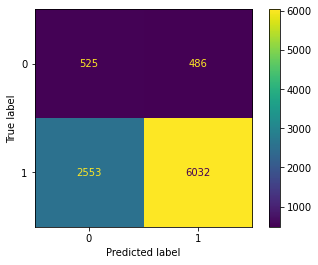

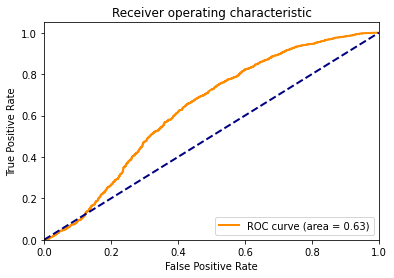

--------Balanced class weights--------------
UAR: 0.6096236102926054
              precision    recall  f1-score   support

           0       0.17      0.50      0.26      1011
           1       0.92      0.72      0.81      8585

    accuracy                           0.69      9596
   macro avg       0.55      0.61      0.53      9596
weighted avg       0.85      0.69      0.75      9596



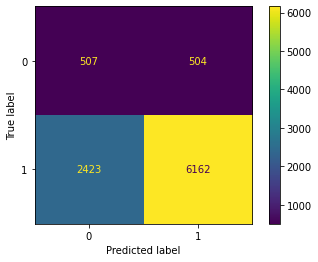

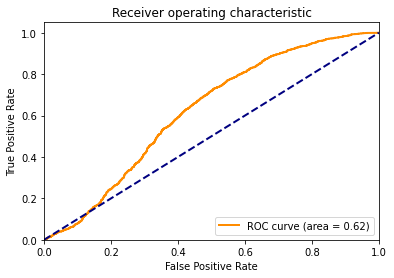

In [114]:
print('--------Random over-undersampling-----------')
calc_performance(y_devel, y_pred_underover)
plot_roc_curve(y_devel, y_pred_underover_prob[:,1])

print('--------Balanced class weights--------------')
calc_performance(y_devel, y_pred_weight)
plot_roc_curve(y_devel, y_pred_weight_prob[:,1])

There were no large difference or performance between both techniques. In this case, it can be concluded as cost-sensitive training is more efficient than the other due to it requires less memory. Balancing the number of outcome labels may not be helpful if it does not show remarkable improvement

In [117]:
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
grid = {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10]}

gridcv = GridSearchCV(SVC(class_weight=class_weight_dict, probability = True),
                      scoring=make_scorer(cal_uar), 
                      param_grid=grid, 
                      n_jobs=-1,
                      cv=cv)

gridcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=SVC(class_weight={0: 4.899484536082475,
                                         1: 0.5568248388986526},
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf']},
             scoring=make_scorer(cal_uar))

UAR: 0.5869522036860694
              precision    recall  f1-score   support

           0       0.22      0.30      0.25      1011
           1       0.91      0.88      0.89      8585

    accuracy                           0.82      9596
   macro avg       0.57      0.59      0.57      9596
weighted avg       0.84      0.82      0.83      9596



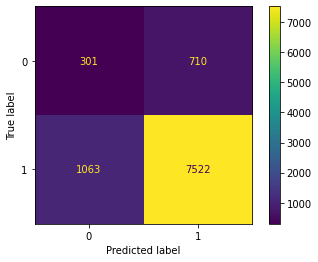

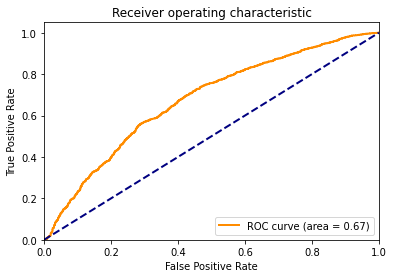

SVC(C=1, class_weight={0: 4.899484536082475, 1: 0.5568248388986526},
    probability=True)


In [118]:
y_pred = gridcv.predict(X_devel_scaled)
y_pred_prob = gridcv.predict_proba(X_devel_scaled)

calc_performance(y_devel, y_pred)
plot_roc_curve(y_devel, y_pred_prob[:,1])

baseline_model = gridcv.best_estimator_
print(baseline_model)

The optimal hyperparameter sets for the SVC model for baseline are:
- rbf kernel
- C == 1

### Task2 Neural Network Classification

Task2 is about exploring suitable 1D-Convolutional Neural Network(1D-CNN) and Feed-forward Neural Network(FNN). Prior to exploration, the identical procedure to find the better technique to handle imbalanced data as before. The detail of process is illustrated in below:

Summaries of process:
- Finding the more appropriate method to handle imbalanced data through empirical training individual baseline networks
- Choose 5 different network topologies (number of layers and units in each layer) which may be 2 pure FNN, 2 pure CNN, and 1 mixed of them.
- activation, optimizer, regularization will be examined through the 5 candidate networks


In [12]:
from tensorflow.keras.utils import to_categorical, set_random_seed
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, RMSprop
from keras.metrics import Recall
import keras.backend as K

from sklearn.preprocessing import StandardScaler

2022-06-03 15:46:09.465787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/changhyun/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-06-03 15:46:09.465813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
    epoch = len(history.history['loss'])
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['unweightedRecall'])
    plt.plot(epoch_range, history.history['val_unweightedRecall'])
    plt.title('Model Evaluation')
    plt.ylabel('Unweighted Average Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def recall(y_true, y_pred):
    # recall of class 1

    #do not use "round" here if you're going to use this as a loss function
    true_positives = K.sum(K.round(y_pred) * y_true)
    possible_positives = K.sum(y_true)
    return true_positives / (possible_positives + K.epsilon())

def unweightedRecall(y_true, y_pred):
    return (recall(y_true[:,0],y_pred[:,0]) + recall(y_true[:,1],y_pred[:,1]))/2.

### Exploring techniques to handle imbalanced data

In this part, 2-layer fnn with sigmoid activation and adam optimizer was used to check which is better

In [14]:
from sklearn.preprocessing import StandardScaler

set_random_seed(random_seed)
n_features = X_train_scaled.shape[1]

over = RandomOverSampler(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy='majority')

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_devel_scaled = scaler.transform(X_devel)

X_train_scaled_bal, y_train_bal = pipeline.fit_resample(X_train_scaled, y_train)

y_train_vec = to_categorical(y_train, 2)
y_train_bal_vec = to_categorical(y_train_bal, 2)
y_devel_vec = to_categorical(y_devel, 2)

In [15]:
def create_baseline_FNN():
    model = Sequential()
    model.add(Dense(128, input_dim=n_features, activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))
    adam = Adam(learning_rate=0.00005)
    model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=[unweightedRecall])
    
#     print(model.summary())
    return model

2022-06-03 15:47:07.254611: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/changhyun/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-06-03 15:47:07.254640: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-03 15:47:07.254663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (changhyun-X510UAR): /proc/driver/nvidia/version does not exist
2022-06-03 15:47:07.254934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


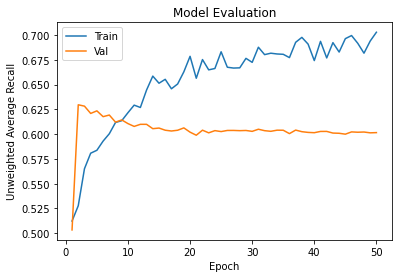

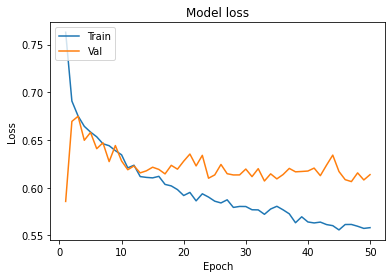

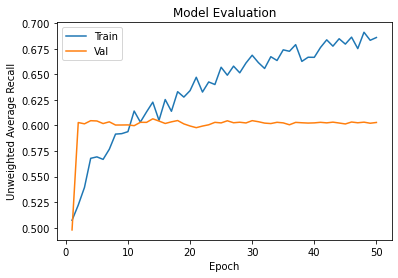

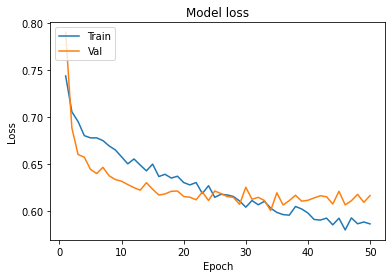

In [16]:
n_features = X_train_scaled.shape[1]

# callback = EarlyStopping(monitor='val_loss', patience=5)
fnn_class = create_baseline_FNN()

epochs = 50
batch_size = 32

history = fnn_class.fit(X_train_scaled, y_train_vec,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_devel_scaled, y_devel_vec),
                 class_weight=class_weight_dict,
                 shuffle=True,                
                 verbose=0)

plot_learningCurve(history, epochs)

fnn_sampling = create_baseline_FNN()

history = fnn_sampling.fit(X_train_scaled_bal, y_train_bal_vec,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(X_devel_scaled, y_devel_vec),
                          shuffle=True,                           
                          verbose=0)

plot_learningCurve(history, epochs)

-----------FNN with class weight--------------
300/300 [==============================] - 0s 930us/step
AUC: 0.6397842140646252
UAR: 0.6084905872329247
              precision    recall  f1-score   support

           0       0.16      0.55      0.25      1011
           1       0.93      0.66      0.77      8585

    accuracy                           0.65      9596
   macro avg       0.54      0.61      0.51      9596
weighted avg       0.85      0.65      0.72      9596



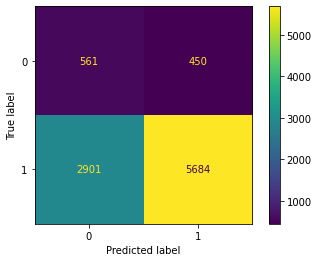

-----------FNN with under-oversampling--------------
300/300 [==============================] - 0s 921us/step
AUC: 0.6400486321978331
UAR: 0.6109722003794026
              precision    recall  f1-score   support

           0       0.17      0.54      0.25      1011
           1       0.93      0.68      0.78      8585

    accuracy                           0.67      9596
   macro avg       0.55      0.61      0.52      9596
weighted avg       0.85      0.67      0.73      9596



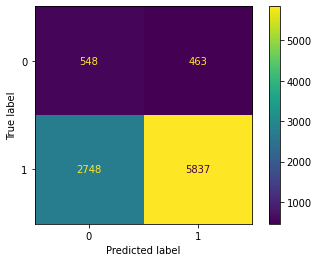

In [17]:
print('-----------FNN with class weight--------------')
y_pred_vec = fnn_class.predict(X_devel_scaled)

y_pred = np.argmax(y_pred_vec, axis=1)

print('AUC:',plot_roc_curve(y_devel, y_pred_vec[:,1]))
calc_performance(y_devel, y_pred)

print('-----------FNN with under-oversampling--------------')
y_pred_vec = fnn_sampling.predict(X_devel_scaled)

y_pred = np.argmax(y_pred_vec, axis=1)

print('AUC:', plot_roc_curve(y_devel, y_pred_vec[:,1]))
calc_performance(y_devel, y_pred)



By comparing under-oversampling and balancing class weight techniques, there is no huge performance difference between two techniques. When it comes to under-oversampling technique used in this assignment, the data was reduced to 1707 for each class which is total 3414 data. From the result, the original data may contain lots of redundant data in the majority class so that in order to train model time-efficiently, under-oversampling method was used

In [250]:
np.array(np.unique(y_devel, return_counts=True)).T

array([[   0, 1011],
       [   1, 8585]])

In [18]:
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train)
# Resampling development dataset will be used at task 4
X_devel_resample, y_devel_resample = pipeline.fit_resample(X_devel_scaled, y_devel)
y_train_vec = to_categorical(y_train_bal, 2)
y_devel_vec = to_categorical(y_devel, 2)

In [86]:
from keras.layers import Conv2D, Conv1D, Reshape, AveragePooling1D
from keras.layers import MaxPooling2D, MaxPooling1D, BatchNormalization, InputLayer, Flatten
from keras.layers import preprocessing, Normalization

# 2 FNN, 2 CNN, 1 Mixed CNN-FNN

normalizer = Normalization()
normalizer.adapt(X_train)

def create_fnn1(n_units1, n_units2, activation, optimizer, lr, dropout):
    model = Sequential()
    model.add(InputLayer(input_shape=n_features))
    model.add(normalizer)
    model.add(Dense(n_units1, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(2, activation='softmax'))
    
    if activation == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif activation == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=[unweightedRecall])
#     print(model.summary())
    return model
    
def create_fnn2(n_units1, n_units2, n_units3, activation, optimizer, lr, dropout):
    model = Sequential()
    model.add(InputLayer(input_shape=n_features))
    model.add(normalizer)
    model.add(Dense(n_units1, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(2, activation='softmax'))
    
    if activation == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif activation == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=[unweightedRecall])
#     print(model.summary())
    return model

def create_cnn1(n_filter1, activation, optimizer, lr, dropout):
    model = Sequential()
    model.add(InputLayer(input_shape=(1, n_features)))
    model.add(normalizer)
    model.add(Dropout(dropout))
    model.add(Conv1D(filters=n_filter1, 
                     kernel_size=1, 
                     input_shape=(1, n_features),
                    activation=activation))
    model.add(BatchNormalization())
#     model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    if activation == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif activation == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=[unweightedRecall])
#     print(model.summary())
    return model

def create_cnn2(n_filter1, n_filter2, activation, optimizer, lr, dropout):
    model = Sequential()
    model.add(InputLayer(input_shape=(1, n_features)))
    model.add(normalizer)
    model.add(Dropout(dropout))
    model.add(Conv1D(filters=n_filter1, 
                     kernel_size=1, 
                     input_shape=(1, n_features),
                    activation=activation))
    model.add(BatchNormalization())
#     model.add(MaxPooling1D(pool_size=1))
    model.add(Conv1D(filters=n_filter2,
                    kernel_size=1,
                    activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
#     model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    if activation == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif activation == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=[unweightedRecall])
#     print(model.summary())
    return model


def create_combine(hidden_units, channels, n_dense_unit1, n_dense_unit2, activation, optimizer, lr, dropout):
    model = Sequential()
    model.add(InputLayer(input_shape=n_features))
    model.add(normalizer)
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units, activation=activation))
    model.add(Reshape((int(hidden_units / channels), channels)))
    model.add(Dropout(dropout))
    model.add(Conv1D(filters=channels,
                    kernel_size=3,
                    activation=activation,
                    use_bias=False,
                    padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(n_dense_unit1, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(n_dense_unit2, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(2, activation='softmax'))
    if activation == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif activation == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=[unweightedRecall])
    
#     print(model.summary())
    return model

def train_model(model, X_train, y_train, X_devel, y_devel):
    epochs = 50
    batch_size = 16

    # callback = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(
        X_train, 
        y_train, 
        batch_size=batch_size, 
        epochs=epochs,
        validation_data=(X_devel, y_devel),
        shuffle=True,
#         class_weight=class_weight_dict,
    #     callbacks=[callback],
        verbose=0
    )
    plot_learningCurve(history, epochs)
    return model
    
def evaluate(title, model, X_devel, y_devel):
    print('-----------', title, '--------------')
    y_pred_vec = model.predict(X_devel)
    
    y_pred = np.argmax(y_pred_vec, axis=1)
    y_true = np.argmax(y_devel, axis=1)
    print('AUC:', plot_roc_curve(y_devel, y_pred_vec))
    calc_performance(y_true, y_pred)    

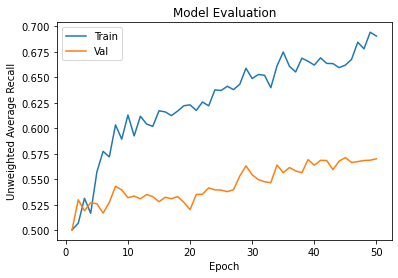

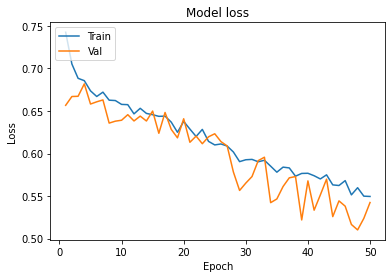

----------- Combined model performance --------------
300/300 [==============================] - 1s 1ms/step
AUC: 0.6839924488172329
UAR: 0.6290763742109942
              precision    recall  f1-score   support

           0       0.18      0.56      0.27      1011
           1       0.93      0.70      0.80      8585

    accuracy                           0.68      9596
   macro avg       0.56      0.63      0.53      9596
weighted avg       0.85      0.68      0.74      9596



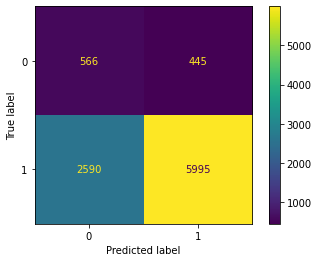

In [88]:
# fnn1 = create_fnn1(32, 16, 'sigmoid', 'adam', 0.00005, 0.5)
# fnn1 = train_model(fnn1, X_train_bal, y_train_vec, X_devel, y_devel_vec)
# evaluate('2-layer FNN performance', fnn1, X_devel, y_devel_vec)

# fnn2 = create_fnn2(64, 32, 8, 'sigmoid', 'rmsprop', 0.00005, 0.5)
# fnn2 = train_model(fnn2, X_train_bal, y_train_vec, X_devel, y_devel_vec)
# evaluate('3-layer FNN performance', fnn2, X_devel, y_devel_vec)

# cnn1 = create_cnn1(32, 'sigmoid', 'rmsprop', 0.00005, 0.3)
# cnn1 = train_model(cnn1, 
#                    X_train_bal.reshape((X_train_bal.shape[0], 1, n_features)), 
#                    y_train_vec, 
#                    X_devel.reshape((X_devel.shape[0], 1, n_features)), y_devel_vec)
# evaluate('Single-layer CNN performance', cnn1, X_devel.reshape((X_devel.shape[0], 1, n_features)), y_devel_vec)

# cnn2 = create_cnn2(8, 4, 'sigmoid', 'rmsprop', 0.00005, 0.3)
# cnn2 = train_model(cnn2, 
#                    X_train_bal.reshape((X_train_bal.shape[0], 1, n_features)), 
#                    y_train_vec, 
#                    X_devel.reshape((X_devel.shape[0], 1, n_features)), y_devel_vec)
# evaluate('2-layer CNN performance', cnn2, X_devel.reshape((X_devel.shape[0], 1, n_features)), y_devel_vec)

combine = create_combine(256, 32, 8, 4, 'sigmoid', 'adam', 0.00001, 0.5)
combine = train_model(combine, X_train_bal, y_train_vec, X_devel, y_devel_vec)
evaluate('Combined model performance', combine, X_devel, y_devel_vec)

### Emprical results
epochs = 50
batch_size = 16

#### 2-layer FNN
| Network Structure  | Activation | Optimizer | Learning_rate | Dropout rate | Performance (UAR) |  AUC   |
| :----------------: | :--------: | :-------: | :-----------: | :----------: | :---------------: | :----: |
| (64, 32)           | Sigmoid    | Adam      | 0.0001        | 0.1          | 59.1%             | 65.0%  |
| (64, 32)           | Sigmoid    | Adam      | 0.00005       | 0.1          | 60.6%             | 65.7%  |
| (32, 16)           | Sigmoid    | Adam      | 0.00005       | 0.1          | 60.1%             | 64.3%  |
| (32, 16)           | Sigmoid    | Adam      | 0.00005       | 0.1          | 60.1%             | 64.3%  |
| (32, 16)           | ReLU       | Adam      | 0.00005       | 0.1          | 59.6%             | 65.1%  |
| (32, 16)           | ReLU       | Adam      | 0.00005       | 0.5          | 57.5%             | 65.3%  |
| (32, 16)           | Sigmoid    | RMSprop   | 0.0001        | 0.5          | 59.7%             | 61.8%  |
| (16, 8)            | Sigmoid    | Adam      | 0.00005       | 0.1          | 60.4%             | 65.2%  |
| (16, 8)            | Sigmoid    | RMSprop   | 0.0001        | 0.5          | 60.1%             | 61.7%  |

#### 3-layer FNN
| Network Structure  | Activation | Optimizer | Learning_rate | Dropout rate | Performance (UAR) |  AUC   |
| :----------------: | :--------: | :-------: | :-----------: | :----------: | :---------------: | :----: |
| (128, 64, 32)      | Sigmoid    | Adam      | 0.0001        | 0.1          | 58.4%             | 66.0%  |
| (128, 64, 32)      | Sigmoid    | Adam      | 0.00005       | 0.1          | 60.0%             | 66.5%  |
| (64, 32, 8)        | Sigmoid    | Adam      | 0.00005       | 0.1          | 61.1%             | 66.4%  |
| (64, 32, 8)        | Sigmoid    | Adam      | 0.00005       | 0.1          | 61.1%             | 66.4%  |
| (64, 32, 8)        | Sigmoid    | RMSprop   | 0.0001        | 0.5          | 59.8%             | 62.9%  |
| (64, 32, 8)        | ReLU       | Adam      | 0.00005       | 0.1          | 59.8%             | 66.1%  |
| (64, 32, 8)        | ReLU       | Adam      | 0.00005       | 0.5          | 59.3%             | 65.2%  |
| (32, 16, 4)        | Sigmoid    | Adam      | 0.00005       | 0.1          | 60.7%             | 65.5%  |
| (32, 16, 4)        | Sigmoid    | RMSprop   | 0.0001        | 0.5          | 59.1%             | 62.3%  |

#### single-layer 1D-CNN
| Network Structure  | Activation | Optimizer | Learning_rate | Dropout rate | Performance (UAR) |  AUC   |
| :----------------: | :--------: | :-------: | :-----------: | :----------: | :---------------: | :----: |
| (32)               | Sigmoid    | Adam      | 0.0001        | 0.1          | 59.5%             | 64.4%  |
| (32)               | Sigmoid    | Adam      | 0.00005       | 0.3          | 60.8%             | 64.8%  |
| (32)               | Sigmoid    | RMSprop   | 0.00005       | 0.3          | 61.4%             | 66.2%  |
| (32)               | Tanh       | Adam      | 0.00001       | 0.5          | 56.3%             | 59.5%  |
| (32)               | ReLU       | Adam      | 0.00001       | 0.5          | 57.9%             | 64.4%  |
| (8)                | Sigmoid    | Adam      | 0.00001       | 0.5          | 57.7%             | 60.7%  |
| (8)                | Sigmoid    | Adam      | 0.00005       | 0.5          | 59.8%             | 64.5%  |

#### 2-layer 1D-CNN
| Network Structure  | Activation | Optimizer | Learning_rate | Dropout rate | Performance (UAR) |  AUC   |
| :----------------: | :--------: | :-------: | :-----------: | :----------: | :---------------: | :----: |
| (64, 32)           | Sigmoid    | Adam      | 0.0001        | 0.1          | 56.8%             | 59.8%  |
| (64, 32)           | Tanh       | Adam      | 0.00001       | 0.5          | 56.4%             | 60.3%  |
| (64, 32)           | ReLU       | Adam      | 0.00001       | 0.5          | 57.8%             | 61.3%  |
| (16, 4)            | Sigmoid    | Adam      | 0.00005       | 0.3          | 59.1%             | 64.2%  |
| (16, 4)            | Sigmoid    | RMSprop   | 0.00005       | 0.3          | 59.4%             | 62.8%  |
| (8, 4)             | Sigmoid    | Adam      | 0.00001       | 0.5          | 60.9%             | 65.6%  |
| (8, 4)             | Sigmoid    | Adam      | 0.00005       | 0.5          | 60.0%             | 64.5%  |

#### Combined with CNN and FNN
| Network Structure  | Activation | Optimizer | Learning_rate | Dropout rate | Performance (UAR) |  AUC   |
| :----------------: | :--------: | :-------: | :-----------: | :----------: | :---------------: | :----: |
| (1024, 8) (16, 8)  | Sigmoid    | Adam      | 0.00001       | 0.3          | 60.0%             | 66.3%  |
| (512, 16) (8, 4)   | Sigmoid    | Adam      | 0.00001       | 0.4          | 61.4%             | 67.9%  |
| (256, 16) (8, 4)   | Sigmoid    | RMSprop   | 0.00001       | 0.4          | 61.8%             | 65.6%  |
| (256, 16) (8, 4)   | Sigmoid    | Adam      | 0.00001       | 0.5          | 63.0%             | 68.4%  |
| (128, 16) (8, 4)   | Sigmoid    | Adam      | 0.00001       | 0.4          | 62.8%             | 67.8%  |
| (128, 16) (8, 4)   | ReLU       | RMSprop   | 0.00001       | 0.4          | 61.0%             | 67.4%  |
| (128, 16) (8, 4)   | Sigmoid    | Adam      | 0.00005       | 0.4          | 60.1%             | 63.7%  |
| (128, 16) (8, 4)   | ReLU       | Adam      | 0.00005       | 0.4          | 60.7%             | 67.4%  |
| (128, 8) (8, 4)    | ReLU       | Adam      | 0.00005       | 0.4          | 60.7%             | 67.4%  |